In [44]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

In [45]:
# Change directory
os.chdir('C:\\Users\\Clone\\OneDrive - v35p0\\Desktop\\Desktop\\Office\\Ecommerce data')

In [46]:
# importing xlsx file into the notebook
df = pd.read_excel('Sample_Order_raw.xlsx', sheet_name=1)
traffic = pd.read_excel('Sample_Traffic_raw.xlsx')

In [47]:
df.head(10)

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status
0,1,A000000001,1,2019-07-01,338000,259000,3000,0,0,Airpay GIRO,CANCELLED
1,2,A000000002,1,2019-07-01,175000,139000,0,0,0,Cash on Delivery,COMPLETED
2,3,A000000003,1,2019-07-01,520000,359000,14927,0,0,Cybersource,COMPLETED
3,4,A000000004,1,2019-07-01,238000,185000,29645,0,0,Cash on Delivery,COMPLETED
4,5,A000000005,1,2019-07-01,159000,129000,14927,0,0,Cash on Delivery,CANCELLED
5,6,A000000006,1,2019-07-01,135000,105000,0,0,0,Cash on Delivery,COMPLETED
6,7,A000000007,1,2019-07-01,159000,129000,3000,0,0,Cash on Delivery,COMPLETED
7,7,A000000007,1,2019-07-01,248000,209000,3000,0,0,Cash on Delivery,COMPLETED
8,8,A000000008,1,2019-07-01,199000,169000,40297,0,0,Cash on Delivery,CANCELLED
9,9,A000000009,1,2019-07-01,198000,169000,0,0,0,Cash on Delivery,CANCELLED


In [48]:
traffic.head(10)

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,google / cpc,407950,344502,723208,0.621901,3.556041,176.025681,0.009079,6566,6.656088e+09
1,youtube / social,77785,55537,163447,0.788115,2.244324,89.944740,0.005855,957,8.429079e+08
2,(direct) / (none),64653,60181,108534,0.553264,4.120340,200.429165,0.009656,1048,1.040851e+09
3,facebook / social,48721,32781,176662,0.844002,1.858996,73.206094,0.002830,500,5.344857e+08
4,youtube.com / referral,27718,17774,42464,0.639224,2.983563,148.443882,0.011963,508,4.025419e+08
5,m.facebook.com / referral,14373,10110,17631,0.699733,2.241960,87.386422,0.007203,127,1.141888e+08
6,l.facebook.com / referral,3661,1712,7144,0.370521,6.868421,736.728024,0.014418,103,1.508016e+08
7,zalo / zalo,2782,2400,4029,0.668404,2.534624,147.251179,0.010673,43,3.732781e+07
8,youtube / (not set),1741,875,2311,0.794461,2.078321,68.363912,0.003029,7,9.263414e+06
9,facebook.com / referral,1594,694,2557,0.495894,4.674228,288.270630,0.011341,29,2.093145e+07


In [49]:
traffic[['Source', 'Medium']] = traffic['Source / Medium'].str.split(' / ', expand=True)
traffic['Profit per users'] = traffic['Revenue']/traffic['Users']
traffic['Avg. Transaction per users'] = traffic['Transactions']/traffic['Users']

# traffic = traffic.drop(index=197)
traffic['Source / Medium'].dropna(inplace=True)
traffic_sorted = traffic.sort_values('Revenue', ascending=False)
traffic_top_10 = traffic_sorted.head(10)
traffic_top_30 = traffic_sorted.head(30)
traffic_top_50 = traffic_sorted.head(50)
traffic_top_100 = traffic_sorted.head(100)

In [50]:
# Create function to unify Source/Medium
def remove_string(df, col_name, remove_list):
    for r in remove_list:
        df[col_name] = df[col_name].str.replace(r, '')
    return df


In [51]:
traffic['Source / Medium'] = traffic['Source / Medium'].str.replace('l\.|m\.|\.com', '', regex=True)
traffic

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,Source,Medium,Profit per users,Avg. Transaction per users
0,google / cpc,407950,344502,723208,0.621901,3.556041,176.025681,0.009079,6566,6.656088e+09,google,cpc,16315.940982,0.016095
1,youtube / social,77785,55537,163447,0.788115,2.244324,89.944740,0.005855,957,8.429079e+08,youtube,social,10836.381514,0.012303
2,(direct) / (none),64653,60181,108534,0.553264,4.120340,200.429165,0.009656,1048,1.040851e+09,(direct),(none),16099.043306,0.016210
3,facebook / social,48721,32781,176662,0.844002,1.858996,73.206094,0.002830,500,5.344857e+08,facebook,social,10970.334892,0.010263
4,youtube / referral,27718,17774,42464,0.639224,2.983563,148.443882,0.011963,508,4.025419e+08,youtube.com,referral,14522.761917,0.018327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,www-dienmayxanh-cocdn.ampproject.org / local_d...,1,0,1,1.000000,1.000000,0.000000,0.000000,0,0.000000e+00,www-dienmayxanh-com.cdn.ampproject.org,local_display,0.000000,0.000000
194,xiaomiviet.vn / local_display,1,0,2,0.000000,4.500000,113.000000,0.000000,0,0.000000e+00,xiaomiviet.vn,local_display,0.000000,0.000000
195,xnxx / local_display,1,0,2,0.500000,1.500000,6.000000,0.000000,0,0.000000e+00,xnxx.com,local_display,0.000000,0.000000
196,zalo / (not set),1,1,1,1.000000,1.000000,0.000000,0.000000,0,0.000000e+00,zalo,(not set),0.000000,0.000000


# II. Data inspection

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61728 entries, 0 to 61727
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_unique_id     61728 non-null  int64         
 1   order_id               61728 non-null  object        
 2   item_quantity          61728 non-null  int64         
 3   created_day            61728 non-null  datetime64[ns]
 4   onsite_original_price  61728 non-null  int64         
 5   selling_price          61728 non-null  int64         
 6   shipping_fee           61728 non-null  int64         
 7   voucher_platform       61728 non-null  int64         
 8   voucher_seller         61728 non-null  int64         
 9   payment_method         61728 non-null  object        
 10  order_status           61728 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 5.2+ MB


In [53]:
df.describe()

,customer_unique_id,item_quantity,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller
count,61728.000000,61728.000000,6.172800e+04,6.172800e+04,61728.000000,61728.0,61728.0
mean,14323.092260,1.111748,2.347072e+05,1.514818e+05,11191.105689,0.0,0.0
std,8050.804821,1.487318,1.574884e+05,1.178384e+05,16157.498442,0.0,0.0
min,1.000000,1.000000,1.000000e+03,0.000000e+00,0.000000,0.0,0.0
25%,7954.000000,1.000000,1.500000e+05,8.900000e+04,0.000000,0.0,0.0
50%,13852.500000,1.000000,1.950000e+05,1.250000e+05,3000.000000,0.0,0.0
75%,20361.250000,1.000000,2.580000e+05,1.790000e+05,16000.000000,0.0,0.0
max,30513.000000,198.000000,1.750000e+06,1.579000e+06,384500.000000,0.0,0.0


In [54]:
df.selling_price.sum()

9350669080

The company's total selling price is 9,350,669,080

In [55]:
df.customer_unique_id.nunique()

30513

The company has 30,513 unique customers

In [56]:
df.payment_method.nunique()

32

The customers choose 32 types of payment methods for purchasing products

# III. Exploratory Analysis

In [57]:
bin_range = df['selling_price'].max()/30
print(bin_range)

52633.333333333336


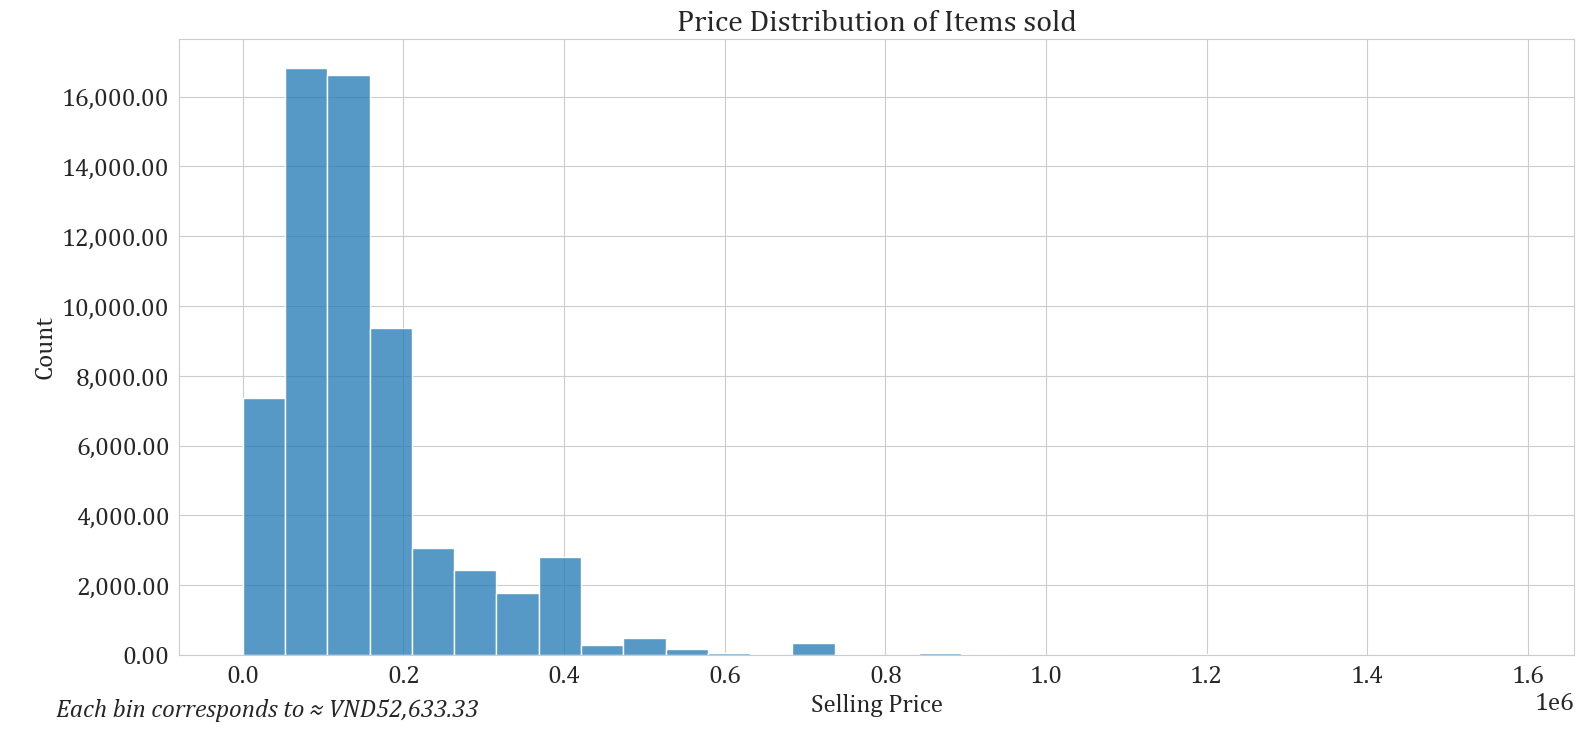

In [58]:
fig, ax = plt.subplots(figsize=(18,8))
sns.histplot(data=df, x='selling_price',bins=30).set(xlabel='Selling Price')
plt.annotate('Each bin corresponds to ≈ VND52,633.33', xy=(40, 15), xycoords='figure points', fontstyle='italic', fontsize=18)
plt.title('Price Distribution of Items sold')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# fig.savefig('Price Distribution of Items sold.png', dpi=500, bbox_to_inches='tight')

In [59]:
# Set style for seaborn into whitegrid, don't need to remove
sns.set_style('whitegrid')

In [60]:
# Change df column to datetime for plotting datetime
df['created_day'] = pd.to_datetime(df['created_day'])

In [61]:
df['discount'] = df['onsite_original_price'] - df['selling_price']
df1 = df.copy()

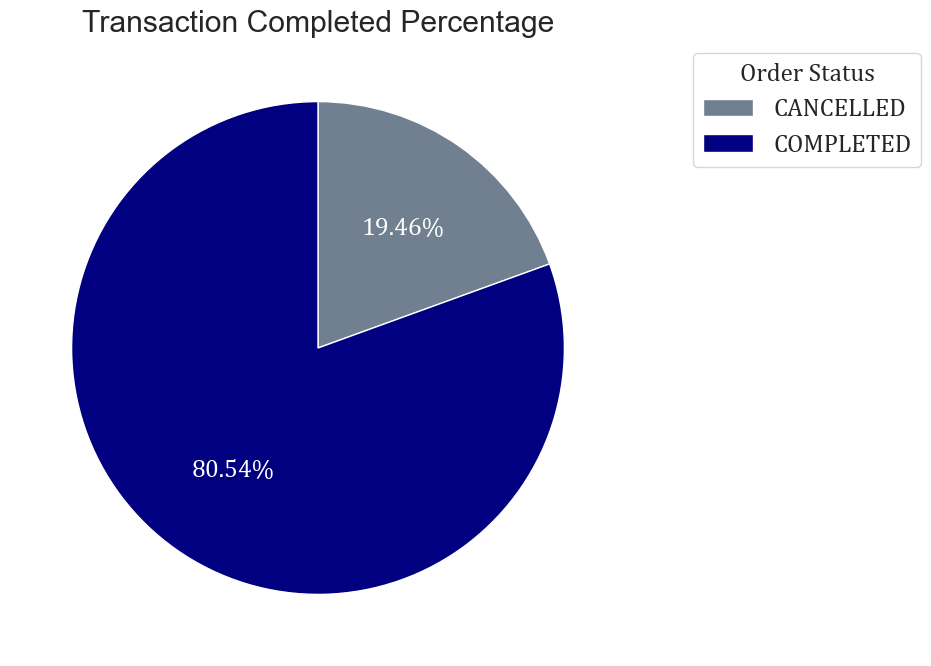

In [62]:
pie = df1.groupby('order_status')['order_id'].count()

labels = pie.index.tolist()
sizes = pie.tolist()
pie_colours = ['slategrey', 'navy']
# create fig, ax
fig, ax1 = plt.subplots(figsize=(18,8))

# set default styles for the plots
plt.rcParams['font.family'] = 'Cambria'
plt.rcParams.update({'font.size': 18})

plt.pie(sizes, labels=labels, colors=pie_colours, autopct='%1.2f%%', startangle=90, counterclock=False, textprops={'color':"w"})
# Add legend
plt.legend([],[], frameon=False)
plt.legend(title="Order Status", loc="upper right", bbox_to_anchor=(1.5, 1))
plt.title('Transaction Completed Percentage')
plt.show()

In [63]:
pie = pie.reset_index()

In [64]:
df1['revenue'] = df1['item_quantity'] * df1['selling_price']

Text(0.5, 1.0, 'Average Discount Value and Item Quantity in each day')

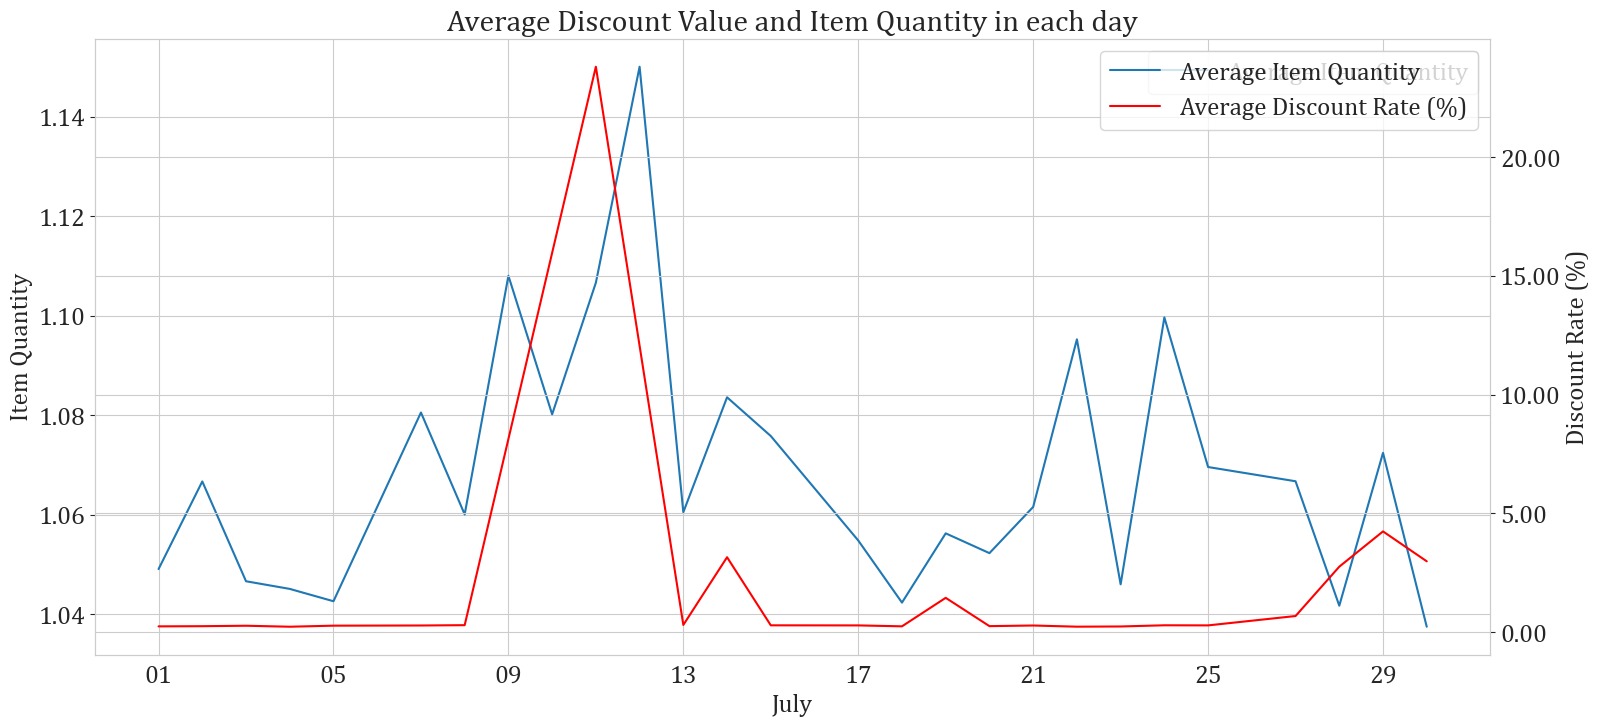

In [65]:
# create fig, ax
fig, ax1 = plt.subplots(figsize=(18,8))

# create table1
table1 = df1.groupby('created_day').agg({'revenue': 'mean', 'item_quantity': 'mean',
                                         'discount': lambda x: (x / df1['selling_price']).mean(),
                                         'selling_price': 'mean'})
table1['cumulative_item_quant'] = df1['item_quantity'].cumsum()

# plot table1 with lineplot, average item quantity in each day
sns.lineplot(x=table1.index, y='item_quantity', data=table1, label='Average Item Quantity', ax=ax1).set(xlabel='July', ylabel='Item Quantity')

# create 2nd ax
ax2 = ax1.twinx()

# plot table2 with lineplot, average discount value in each day
sns.lineplot(x=table1.index, y='discount', data=table1, ax=ax2, color='r', label='Average Discount Rate (%)')
ax2.set_ylabel('Discount Rate (%)')

# set x-axis tick format
date_fmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(date_fmt)

# set month below date axis
month_fmt = mdates.DateFormatter('%b')
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_formatter(month_fmt)

# set color of month ticks
for tick in ax1.xaxis.get_minor_ticks():
    tick.label1.set_color('gray')

# format the secondary y-axis labels
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
plt.title('Average Discount Value and Item Quantity in each day')
# fig.savefig('Average Discount Rate and Item Quantity in each day.png', dpi=400, bbox_inches='tight')

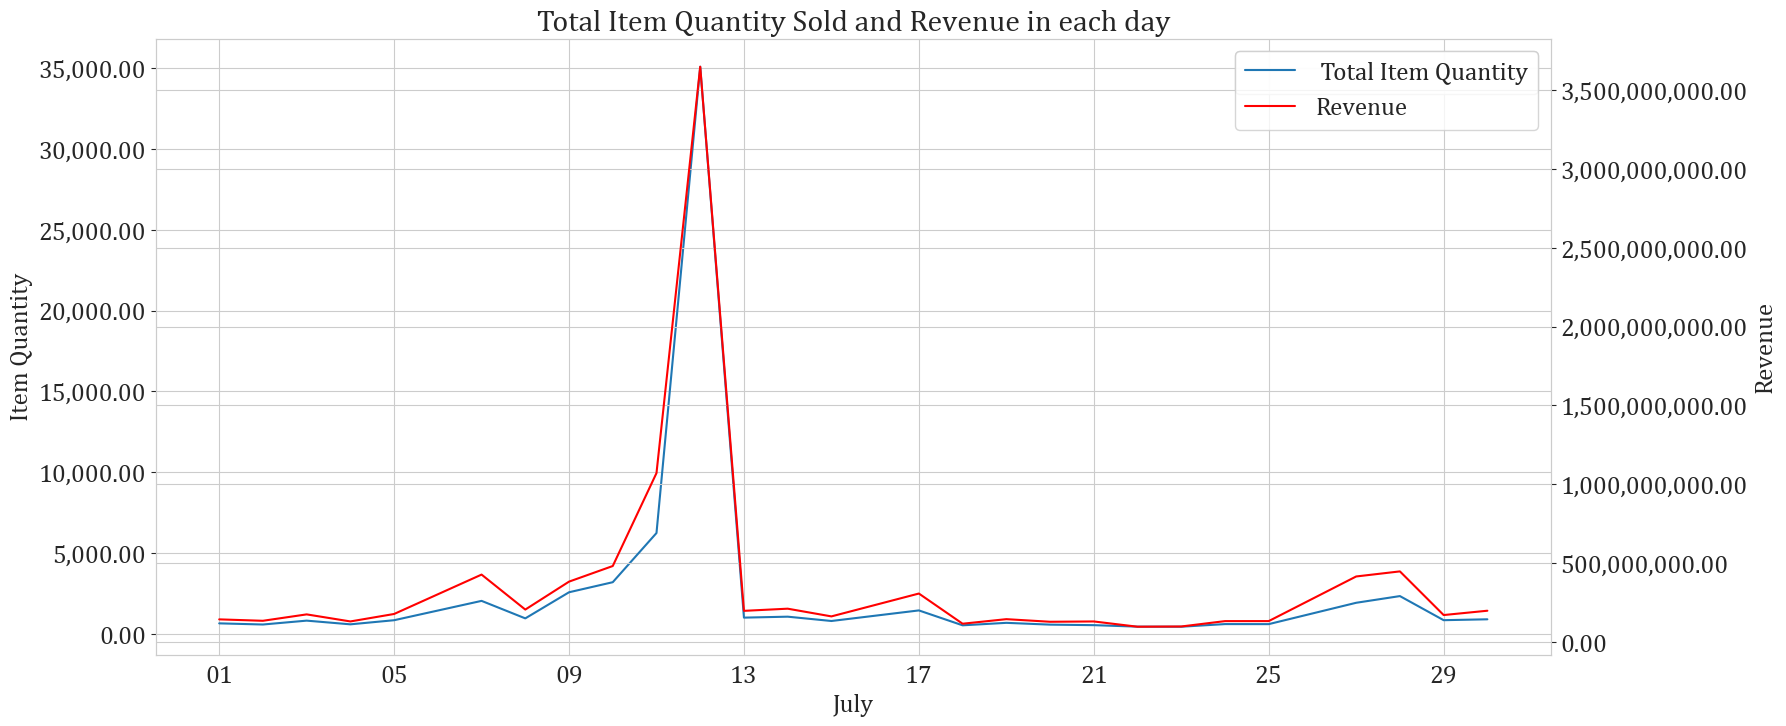

In [66]:
# create fig, ax
fig, ax1 = plt.subplots(figsize=(18,8))

# create 2nd ax
ax2 = ax1.twinx()

# create tabl2 pivot table
table2= df1.groupby('created_day').agg({'revenue':'sum', 'item_quantity':'sum'})

# plot the line plot
sns.lineplot(x=table2.index, y='item_quantity', data=table2, label=' Total Item Quantity', ax=ax1).set(xlabel='date', ylabel='Item Quantity')

plt.title('Total Item Quantity Sold and Revenue in each day')

# plot table2 with lineplot, average discount value in each day
sns.lineplot(x=table2.index, y='revenue', data=table2, ax=ax2, color='r', label='Revenue')
ax2.set_ylabel('Revenue')

# set x-axis tick format
date_fmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(date_fmt)

# set month below date axis
month_fmt = mdates.DateFormatter('%b')
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_formatter(month_fmt)

# set color of month ticks
for tick in ax.xaxis.get_minor_ticks():
    tick.label1.set_color('gray')
ax1.set_xlabel('July')   
# format the primary y-axis labels
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# format the secondary y-axis labels
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

fig.savefig('Sum of Item Quantity in each day.png', dpi=400, bbox_inches='tight')

Text(0.5, 1.0, 'Average Revenue and Discount Value in each day')

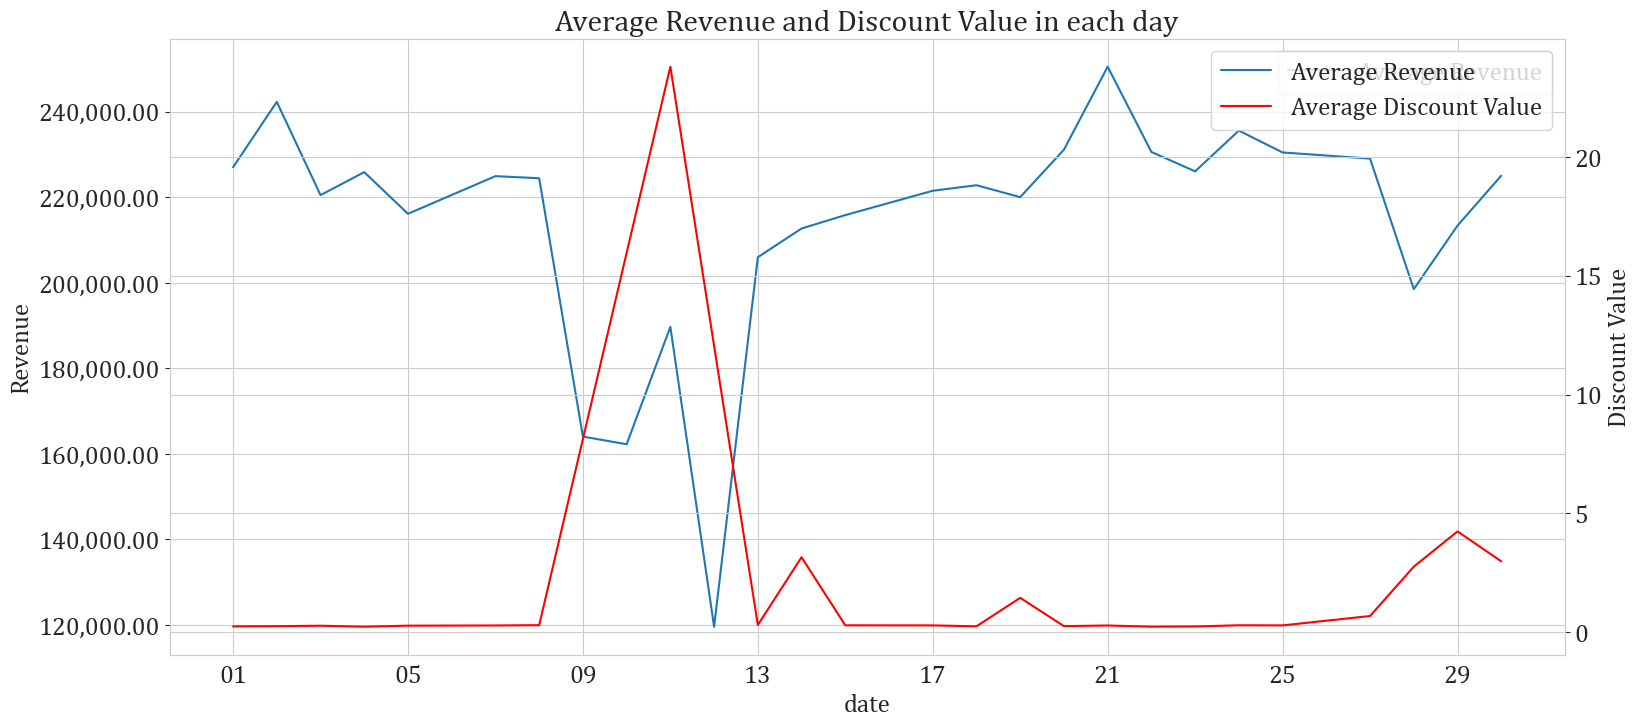

In [67]:
# create fig, ax
fig, ax1 = plt.subplots(figsize=(18,8))

# plot table1 with lineplot, average item quantity in each day
sns.lineplot(x=table1.index, y='revenue', data=table1, label='Average Revenue', ax=ax1).set(xlabel='date', ylabel='Revenue')

# create 2nd ax
ax2 = ax1.twinx()

# plot table1 with lineplot, average discount value in each day
sns.lineplot(x=table1.index, y='discount', data=table1, ax=ax2, color='r', label='Average Discount Value')
ax2.set_ylabel('Discount Value')

# set x-axis tick format
date_fmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(date_fmt)

# set month below date axis
month_fmt = mdates.DateFormatter('%b')
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_formatter(month_fmt)

# set color of month ticks
for tick in ax1.xaxis.get_minor_ticks():
    tick.label1.set_color('gray')

# format the secondary y-axis labels
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
plt.title('Average Revenue and Discount Value in each day')
# fig.savefig('Average Revenue and Discount Value in each day.png', dpi=400, bbox_inches='tight')

In [68]:
cluster = df.groupby('customer_unique_id').agg({'order_id':'count', 'selling_price':'mean'})

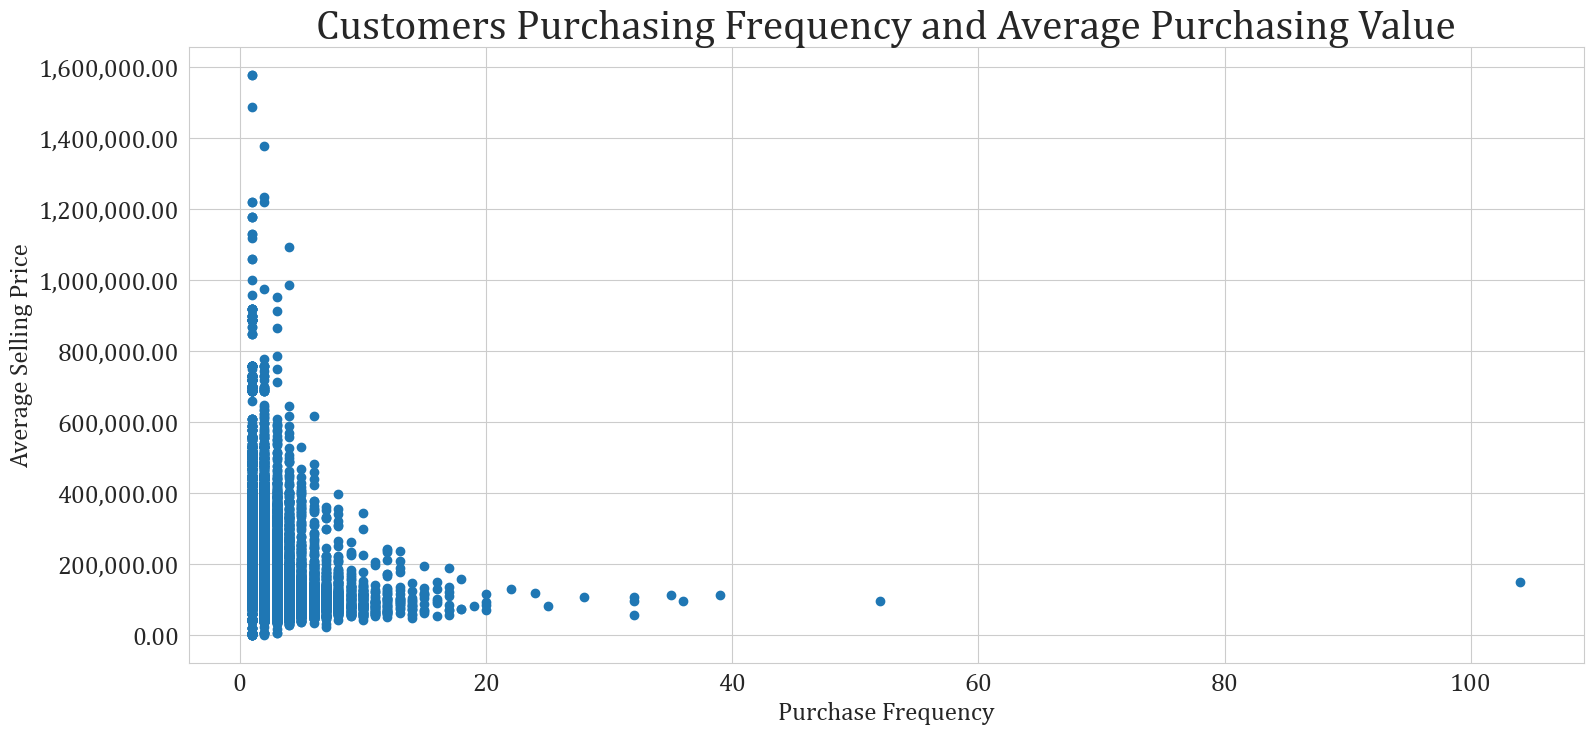

In [69]:
fig, ax= plt.subplots(figsize=(18, 8))
plt.scatter(cluster['order_id'], cluster['selling_price'])
plt.xlabel('Purchase Frequency', size=18)
plt.ylabel('Average Selling Price', size=18)
plt.title('Customers Purchasing Frequency and Average Purchasing Value', size=30)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

C:\Users\Clone\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


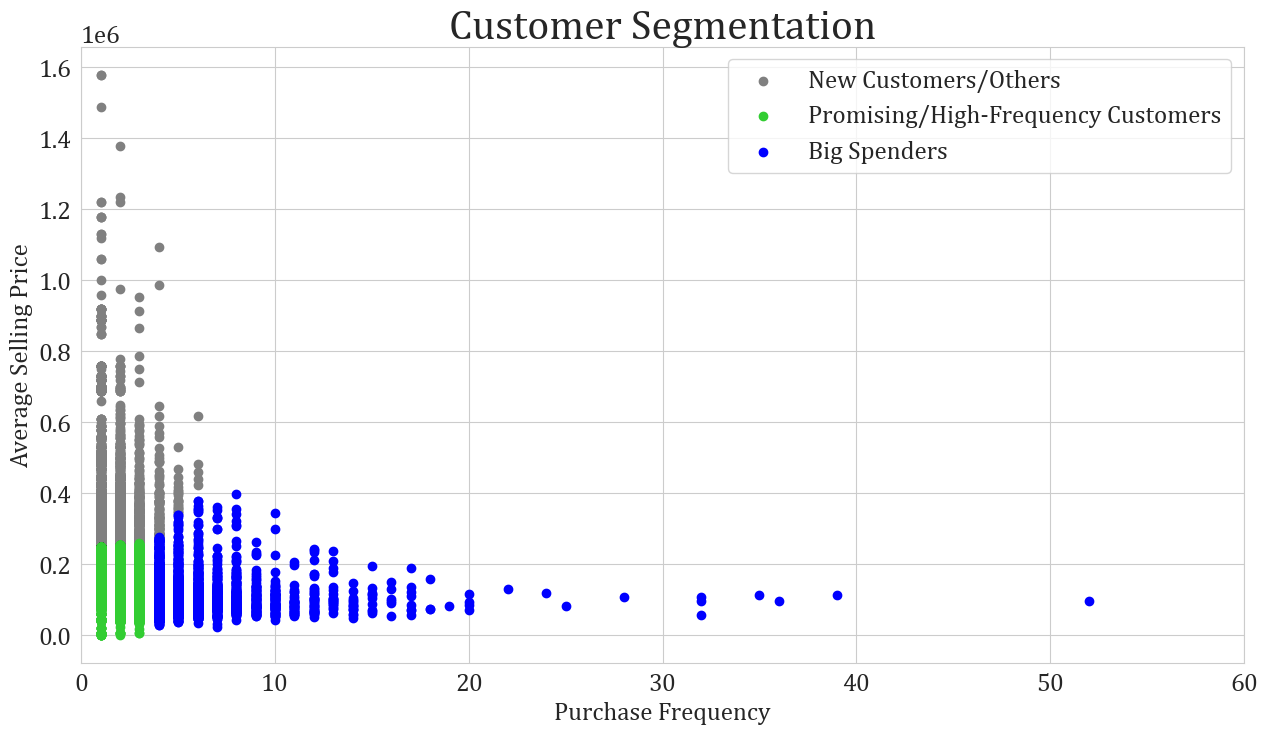

In [70]:
# Define custom colors and cluster labels
colors = ['grey', 'limegreen', 'blue']
labels = ['New Customers/Others', 'Promising/High-Frequency Customers', 'Big Spenders']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=30)
kmeans.fit(scaled_data)

# Add the cluster labels to the original data
cluster['Cluster'] = kmeans.labels_

# Visualize the results with custom colors and legend
fig, ax= plt.subplots(figsize=(15, 8))
mpl.rcParams['font.family'] = 'Cambria'
for i in range(3):
    cluster_subset = cluster[cluster['Cluster'] == i]
    plt.scatter(cluster_subset['order_id'], cluster_subset['selling_price'], c=colors[i], label=labels[i])
plt.xlim(0, 60)
plt.xlabel('Purchase Frequency', size=18)
plt.ylabel('Average Selling Price', size=18)
plt.title('Customer Segmentation', size=30)

# Add legend
plt.legend()

# Show the plot
plt.show()
fig.savefig('Customer Segmentations.png', dpi=500)


In [71]:
df2 = df.copy()

In [72]:
df2['cluster'] = df2['customer_unique_id'].map(cluster.Cluster)
df2

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status,discount,cluster
0,1,A000000001,1,2019-07-01,338000,259000,3000,0,0,Airpay GIRO,CANCELLED,79000,1
1,2,A000000002,1,2019-07-01,175000,139000,0,0,0,Cash on Delivery,COMPLETED,36000,1
2,3,A000000003,1,2019-07-01,520000,359000,14927,0,0,Cybersource,COMPLETED,161000,0
3,4,A000000004,1,2019-07-01,238000,185000,29645,0,0,Cash on Delivery,COMPLETED,53000,1
4,5,A000000005,1,2019-07-01,159000,129000,14927,0,0,Cash on Delivery,CANCELLED,30000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61723,30091,A000037831,1,2019-07-30,155000,119000,10000,0,0,Cash on Delivery,COMPLETED,36000,1
61724,30511,A000037832,1,2019-07-30,475000,399000,10000,0,0,Cash on Delivery,COMPLETED,76000,0
61725,30512,A000037833,1,2019-07-30,135000,99000,35641,0,0,Cash on Delivery,COMPLETED,36000,1
61726,30513,A000037834,1,2019-07-30,350000,209000,0,0,0,VN Airpay Ibanking (Techcombank),CANCELLED,141000,1


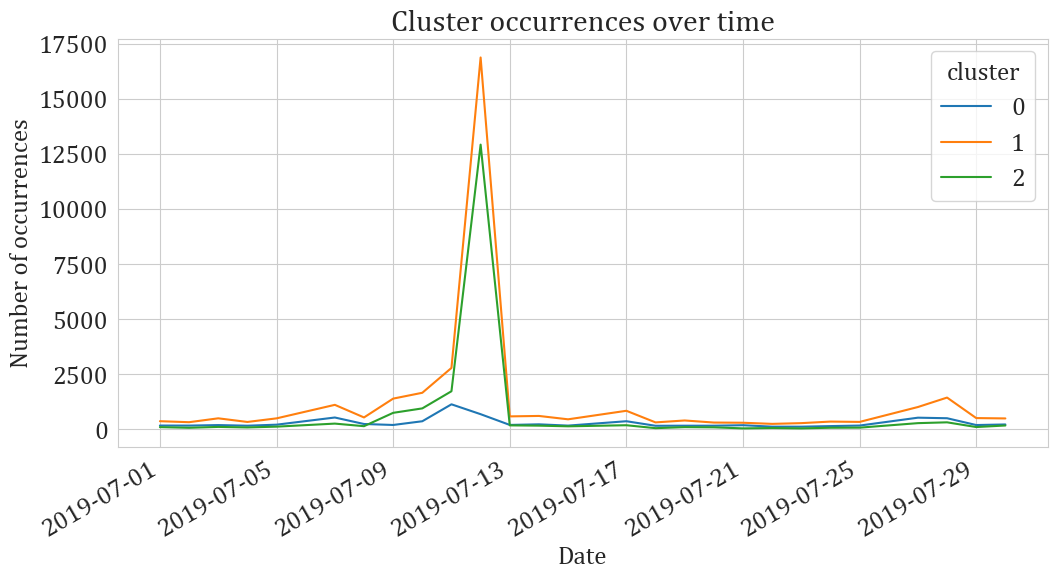

In [73]:
counts = df2.groupby([pd.Grouper(key='created_day', freq='D'), 'cluster']).size().reset_index(name='count')
# Pivot the counts table to create a matrix of counts for each cluster and time interval
pivot_counts = counts.pivot(index='created_day', columns='cluster', values='count').fillna(0)
# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
pivot_counts.plot(ax=ax, kind='line')
ax.set_xlabel('Date')
ax.set_ylabel('Number of occurrences')
ax.set_title('Cluster occurrences over time')
plt.show()

In [74]:
df['main_payment_method'] = df['payment_method'].str.extract('(.*?)\s*\(')
df['main_payment_method'].fillna(df['payment_method'], inplace=True)

In [75]:
table4 = df.groupby('main_payment_method').agg(
    order_id_percent=('order_id', lambda x: (x.count()/df['order_id'].count())*100),
    order_status_complete_percent=('order_status', lambda x: ((x == 'COMPLETED').sum()/x.count())*100),
    order_status_cancelled_percent=('order_status', lambda x: ((x == 'CANCELLED').sum()/x.count())*100)
)
table4

,order_id_percent,order_status_complete_percent,order_status_cancelled_percent
main_payment_method,,,
Airpay GIRO,4.542509,78.708987,21.291013
Airpay Wallet V2,2.214554,87.710315,12.289685
Cash on Delivery,87.461120,80.703119,19.296881
Cybersource,3.287001,95.662888,4.337112
Shopee Wallet,0.592924,93.169399,6.830601
VN Airpay Ibanking,1.901892,39.097104,60.902896


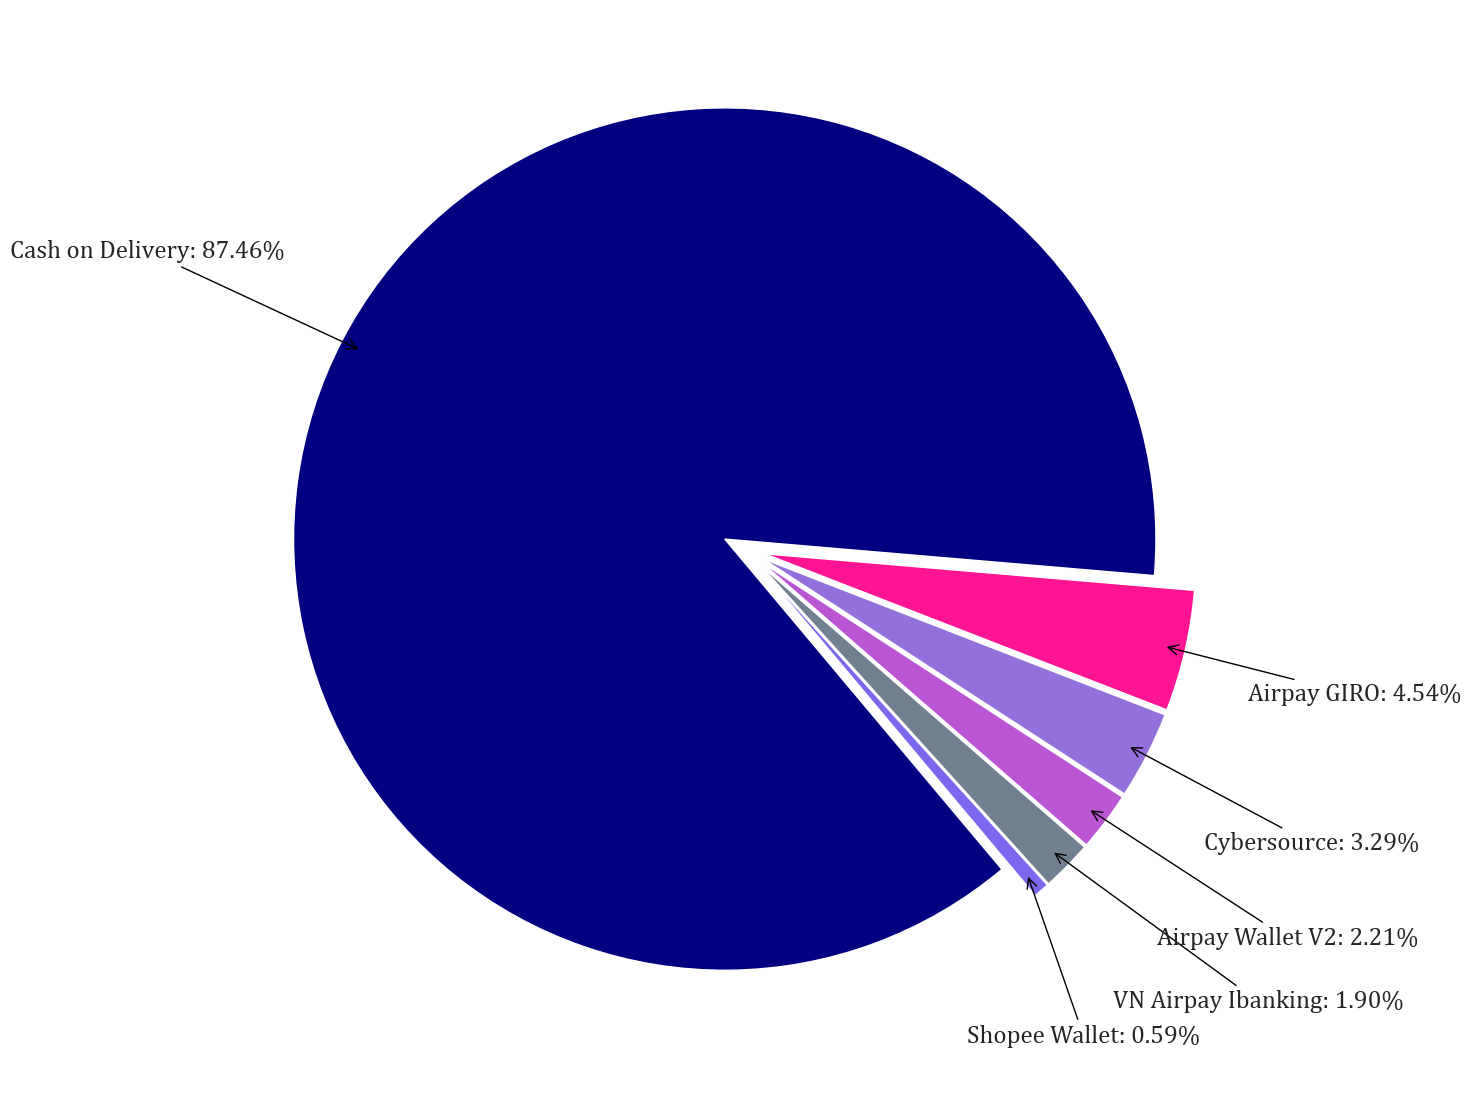

In [76]:
table3 = df.groupby('main_payment_method')['order_id'].agg(lambda x: len(x)/len(df)*100).sort_values()
colours = ['mediumslateblue', 'slategrey', 'mediumorchid', 'mediumpurple', 'deeppink', 'navy']
explode = [0.05]*len(table3)

plt.rcParams['font.family'] = 'Cambria'
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(table3, colors=colours, explode=explode, autopct='', 
                                  startangle=-50)

kw = dict(arrowprops=dict(arrowstyle="->", color='black'), va="center")
for i, (p, label) in enumerate(zip(wedges, table3.index)):
    ang = np.deg2rad((p.theta1 + p.theta2)/2)
    y = np.sin(ang)
    x = np.cos(ang)
    horizontalalignment = "center" if abs(x) < abs(y) else "right" if x < 0 else "left"
    ax.annotate(f"{label}: {table3[i]:.2f}%", xy=(1*x, 1*y), xytext=(1.2*x, 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
# fig.savefig('Percentage_of_Main_Payment_Method.png', dpi=300, bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'Correlation heatmap of Top 30 Traffic Sites')

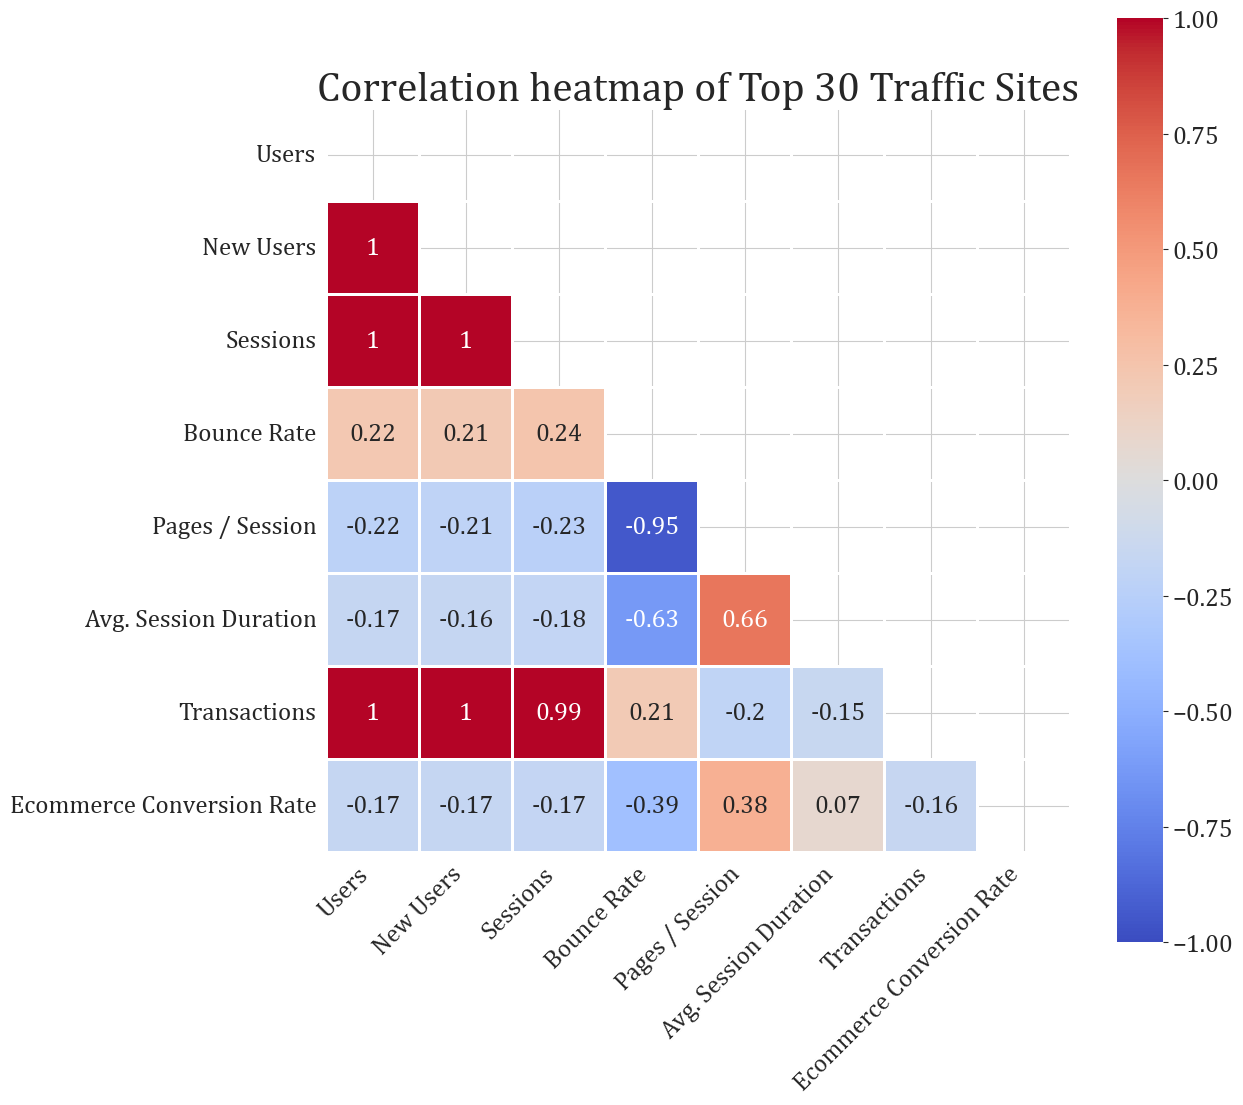

In [77]:
cols1 = ['Users','New Users', 'Sessions', 'Bounce Rate', 'Pages / Session', 'Avg. Session Duration', 'Transactions',
        'Ecommerce Conversion Rate']

#create fig, ax 
fig, ax = plt.subplots(figsize=(12,12))
corr_matrix1 = traffic_top_30[cols1].corr()
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm',
           square=True, cbar=True, vmin=-1, vmax=1, center=0, mask=np.triu(corr_matrix1), 
            linecolor='white', linewidths=1, cbar_ax=None, ax=None,)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation heatmap of Top 30 Traffic Sites',fontsize=30)
# fig.savefig('Correlation heatmap.png', dpi=500, bbox_inches='tight')

In [78]:
source = traffic.groupby('Source / Medium').agg({'Users':'sum',
                               'New Users':'sum',
                               'Sessions':'mean',
                               'Bounce Rate':'mean',
                               'Pages / Session':'mean',
                               'Ecommerce Conversion Rate':'mean',
                               'Transactions':'sum',
                               'Revenue':'sum',
                               'Avg. Session Duration':'mean',
                              'Profit per users':'sum'})
source_top_30 = source.sort_values('Revenue', ascending=False).head(30)

In [79]:
def NormaliseData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
def InvertNormalisedData(data):
    return 1 - ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [80]:
source_top_30['Bounce Rate Normalised'] = NormaliseData(source_top_30['Bounce Rate'])
source_top_30['Pages/Session Normalised'] = NormaliseData(source_top_30['Pages / Session'])
source_top_30['Ecommerce Conversion Rate Normalised'] = NormaliseData(source_top_30['Ecommerce Conversion Rate'])
source_top_30['Sessions InvertedNormalised'] = NormaliseData(source_top_30['Sessions'])
source_top_30['Sessions Duration InvertedNormalised'] = NormaliseData(source_top_30['Avg. Session Duration'])
source_top_30['new_metrics'] = (source_top_30['Pages/Session Normalised'] + source_top_30['Sessions InvertedNormalised']).mean()
source_top_30['new_metrics2'] = (source_top_30['Bounce Rate Normalised'] + source_top_30['Sessions Duration InvertedNormalised']).mean()

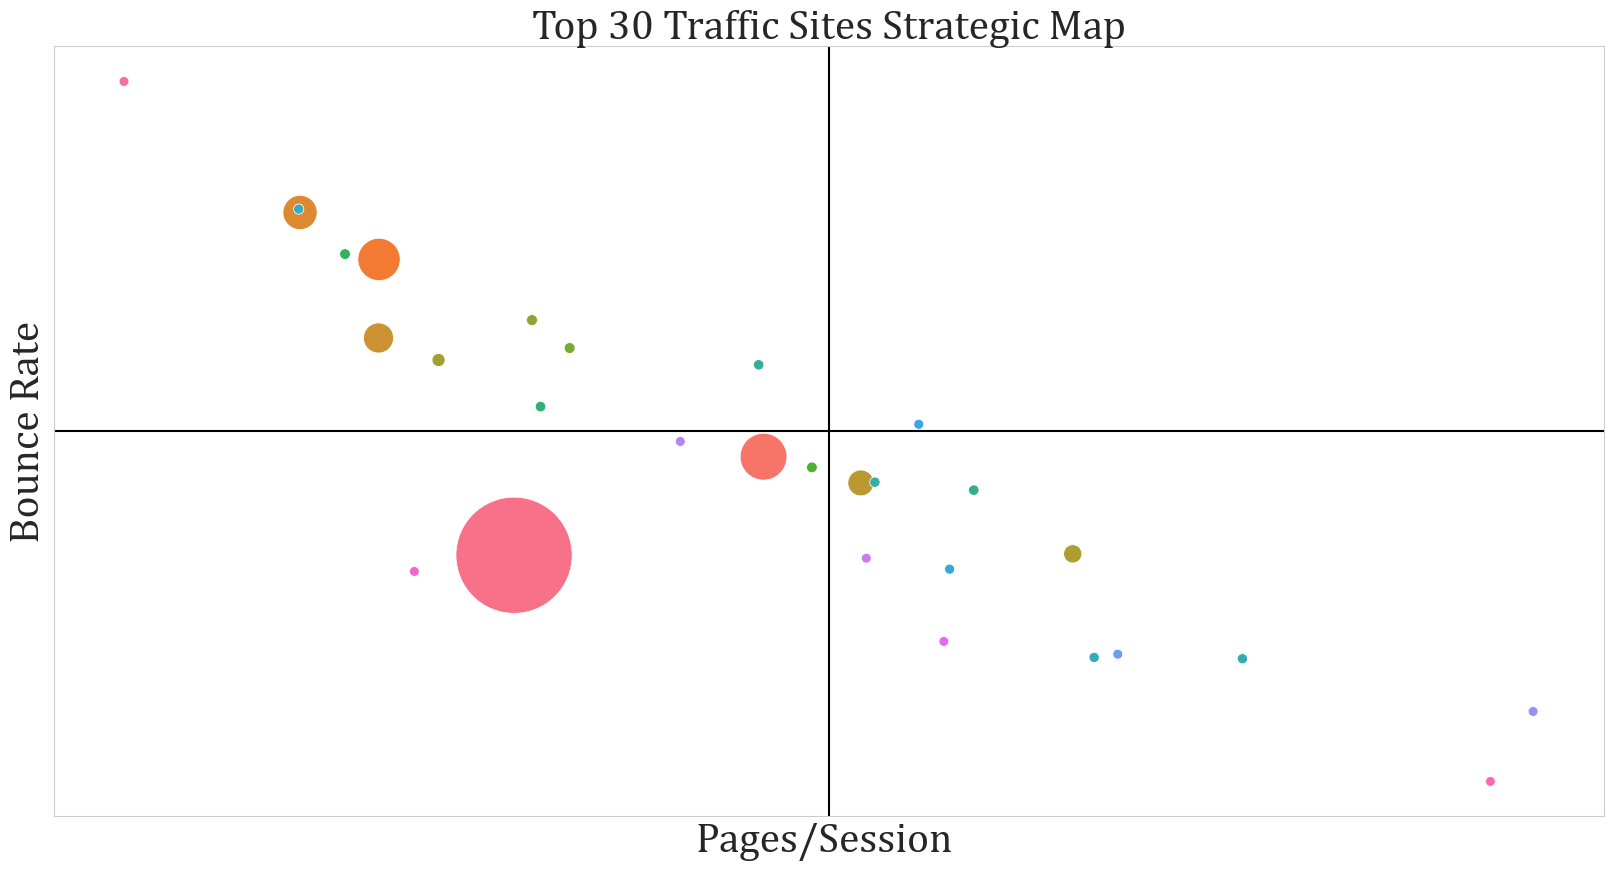

In [81]:
fig, ax = plt.subplots(figsize=(20,10))

g= sns.scatterplot(data=source_top_30, x='Pages/Session Normalised',
                    y="Bounce Rate Normalised", color='black', size='Revenue', 
                    sizes=(50, 7000),
                    legend=False, hue='Source / Medium', alpha=1)
# Add labels to each dot in the plot
#for index, row in source_top_30[:10].reset_index().iterrows():
#    plt.text(row['Pages/Session Normalised'], row['Bounce Rate Normalised'], row['Source / Medium'], fontsize=18, ha='left', va='bottom')


# plot mean values on x-axis and y-axis
x_mean = 0.5
y_mean = 0.5
# Create cross-axes
plt.axvline(x_mean, color='black', linestyle='-')
plt.axhline(y_mean, color='black', linestyle='-')

# add a custom legend with dots
# plt.legend(hue_values, title='Species', loc='upper right')

# set plot title and axis labels
plt.title("Top 30 Traffic Sites Strategic Map", size=30)
plt.xlabel("Pages/Session ", size=30)
plt.ylabel("Bounce Rate",size=30)

# Remove ticks from both axes
ax.set_xticks([])
ax.set_yticks([])


plt.show()
# fig.savefig('Strategic map.png', dpi=500, bbox_to_inches='tight')